Hi! This is an implementation of what I learned from Andrew Ng's course on Deep learning on Coursera! It's a simple Logistic Regression function/set of functions! Details:- We are doing one neuron with nx dimensional input, m training sets and binary output. I'm not doing the train-test split as I am only testing my knowledge of maths of log reg.

In [10]:
# Import the important libs
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# One of the important things I learned from the course was the value of declaring proper shapes for datasets
def init_zero(nx):
  # We start with Zero as the initialization since it's much faster than a random initialization
  # Here nx is the number of dimensions
  w = np.zeros((nx,1))
  b = 0.0
  # Here b is a scalar constant since we have a single layer of neurons
  return w,b

In [23]:
def sigmoid(x):
  # The all important sigmoid function that we need
  s = 1/(1+np.exp(-x))
  # here we use np.exp for vectorization
  return s

In [32]:
def cost(y,yhat):
  # Returns the value of average loss over a training set
  # this is also a vectorized method :)
  return - (1/Y.shape[-1])*np.sum(Y * np.log(yhat) + (1 - Y) * np.log(1 - yhat))

In [14]:
def forward(w,b,X):
  return sigmoid(np.dot(w.T,X)+b)

In [29]:
def propagate(w,b,X,Y):
  # Implementing one iteration of forward pass and back prop to get dw and db
  # Forward Pass:
  Yhat = forward(w,b,X)
  dZ = Yhat - Y
  # dz is the derivative term for Z which is wX + b
  dw = (1/X.shape[-1])*np.dot( X , dZ.T )
  db = (1/X.shape[-1])*np.sum(dZ)
  return {'dw': dw,
          'db': db,}

In [38]:
# Let's put everything together
def model(X , Y , alpha , printcost = False,niter = 200):
  w,b = init_zero(X.shape[0])
  costsheet= []
  # The only for loop we need 
  for i in range(niter):
    dwdb = propagate(w,b,X,Y)
    dw = dwdb["dw"]
    db = dwdb["db"]
    # Update weights
    w = w - alpha * dw
    b = b - alpha * db
    c = cost(Y,forward(w,b,X))
    costsheet.append(c)
    # Creating a list to display our progress over iterations
    if printcost:
      print(f"The cost for iteration {niter} is {c}.")
  return {
        "params" : {
            "w":w,
            "b":b,
        },
        "costdata": costsheet,
    }


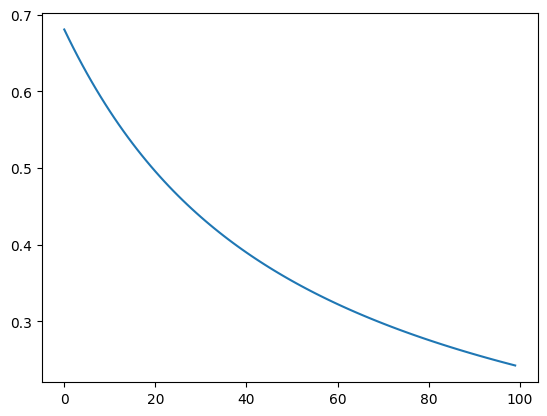

In [39]:
# Let's test our model for a very simple test data
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
dat = model(X , Y , 0.01 , niter = 100)
plt.plot(dat["costdata"])

YAY! It works for this data! without an error... which means the math isn't wrong!